# Iris Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop('Id', inplace=True, axis=1)

In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.shape

(150, 5)

In [13]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
mean_sepal_length=df.groupby('species')['sepal_length'].mean()

In [16]:
print("Mean of the sepal length of each species : ")
print(mean_sepal_length)

Mean of the sepal length of each species : 
species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64


In [17]:
median_petal_width=df.groupby('species')['petal_width'].median()

In [18]:
print("Median of the petal width of each species : ")
print(median_petal_width)

Median of the petal width of each species : 
species
Iris-setosa        0.2
Iris-versicolor    1.3
Iris-virginica     2.0
Name: petal_width, dtype: float64


# PreProcessing of Data

In [19]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
print(X_train.shape)
print(y_train.shape)

(120, 3)
(120,)


In [24]:
print(X_test.shape)
print(y_test.shape)

(30, 3)
(30,)


# Data Visualisation

<Figure size 432x288 with 0 Axes>

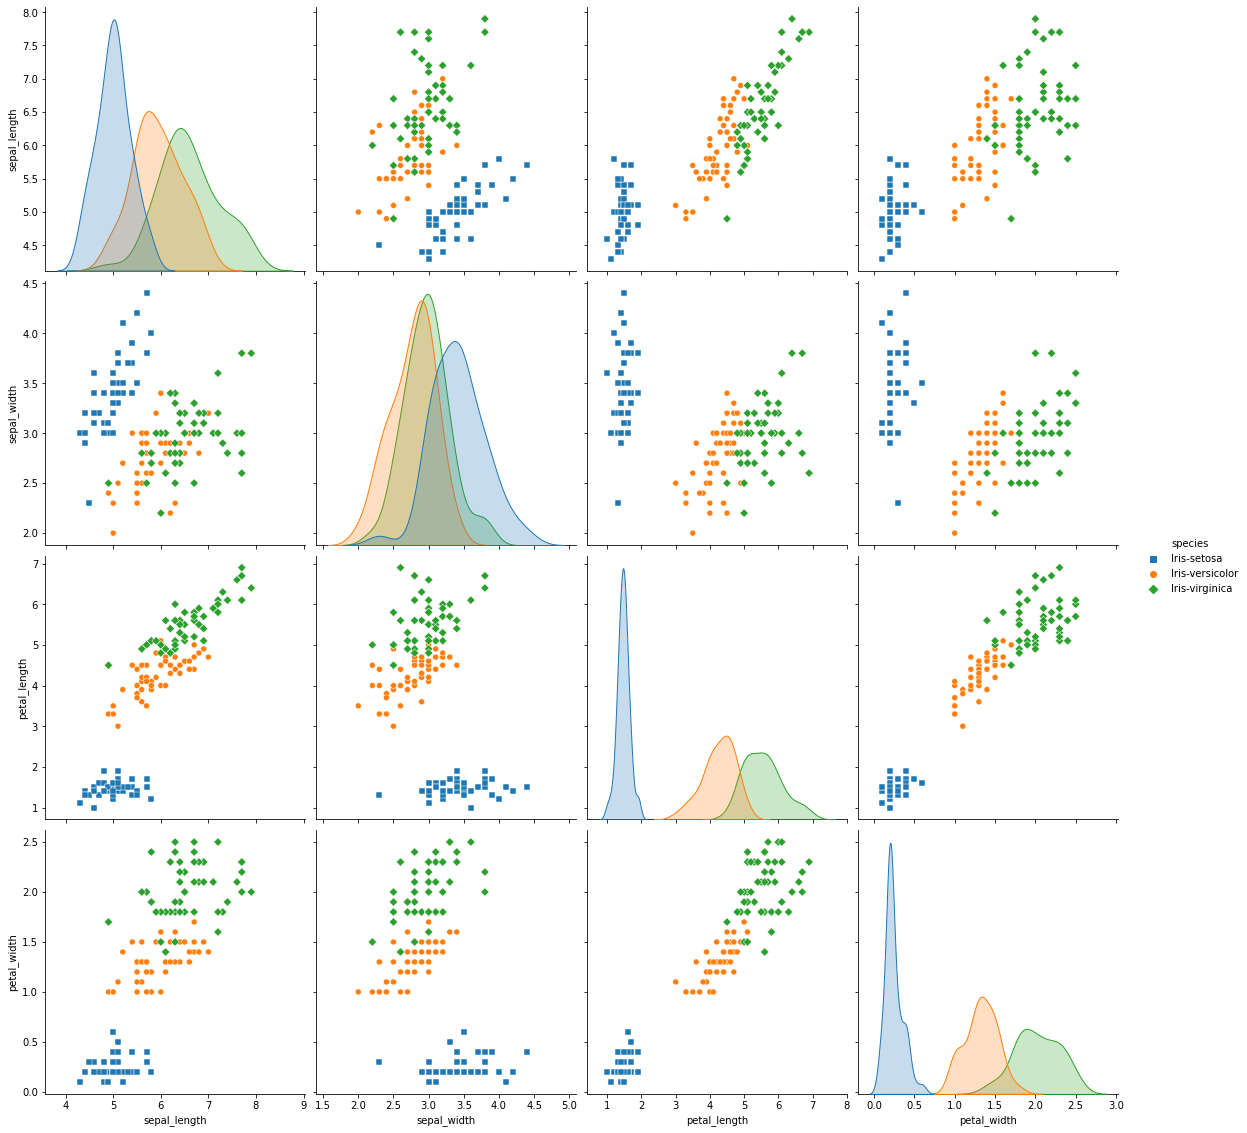

In [25]:
plt.figure()
sns.pairplot(df,hue = "species", height=4, markers=["s", "o", "D"])
plt.show()

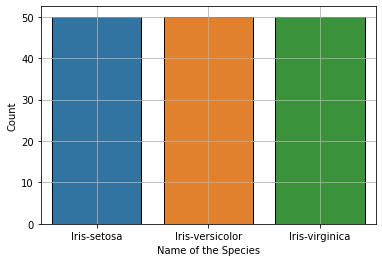

In [26]:
sns.countplot(data=df,x='species',ec='black')
plt.xlabel("Name of the Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

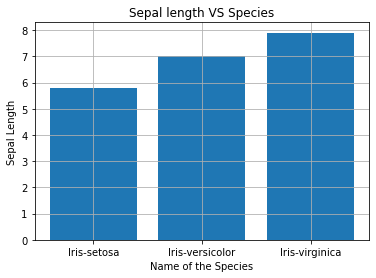

In [27]:
plt.bar(df['species'],df['sepal_length'])
plt.title("Sepal length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()

# Attribute Values in Data Set

In [28]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [29]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [30]:
df['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [31]:
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

# Import Machine Learning and Model Building Packages

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

In [33]:
X=df.drop('species',axis=1)
Y=df['species']

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,random_state=20)

In [35]:
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)

In [37]:
X_train

array([[ 0.16782396,  0.69731669,  0.41803027,  0.49149268],
       [-1.16414597, -0.20346634, -1.32614799, -1.315932  ],
       [ 0.65217667,  0.24692517,  0.41803027,  0.36239091],
       [ 1.86305843, -0.65385786,  1.31825131,  0.87879796],
       [-0.19544056, -0.65385786,  0.41803027,  0.10418739],
       [ 0.28891214, -1.10424937,  1.03693224,  0.23328915],
       [-1.16414597,  0.02172942, -1.26988417, -1.44503377],
       [ 1.01544119,  0.02172942,  0.36176646,  0.23328915],
       [ 0.53108849,  0.47212093,  0.5305579 ,  0.49149268],
       [-1.40632232,  0.24692517, -1.3824118 , -1.315932  ],
       [-0.55870509,  1.82329547, -1.15735654, -1.05772848],
       [-1.0430578 ,  0.47212093, -1.32614799, -1.315932  ],
       [-0.19544056, -1.32944513,  0.69934935,  1.00789973],
       [-0.92196962,  1.59809971, -1.04482891, -1.05772848],
       [ 0.65217667, -0.65385786,  1.03693224,  1.26610325],
       [ 0.41000031,  0.69731669,  0.92440461,  1.39520502],
       [-0.55870509,  0.

In [38]:
X_test=scaler.fit_transform(X_test)

In [39]:
X_test

array([[-1.44478718,  0.70734698, -1.39251151, -1.31338208],
       [ 0.38234415, -0.37624839,  0.5514411 ,  0.09381301],
       [ 0.74777041, -0.10534955,  0.31581048,  0.23453251],
       [ 1.72224045,  0.16554929,  1.1994253 ,  0.65669104],
       [ 0.01691788, -0.64714724,  0.19799517, -0.18762601],
       [-0.34850838, -1.18894492,  0.13908752,  0.23453251],
       [ 1.23500543,  0.70734698,  1.25833296,  1.6417276 ],
       [-0.8357434 ,  2.0618412 , -1.33360385, -1.03194307],
       [ 1.11319668, -1.18894492,  1.1994253 ,  0.93813006],
       [-1.20116967,  0.16554929, -1.39251151, -1.45410159],
       [ 0.86957917,  0.16554929,  0.84597938,  1.21956908],
       [ 1.23500543, -0.37624839,  0.61034876,  0.37525202],
       [ 0.26053539, -2.00164146,  0.72816407,  0.51597153],
       [-0.95755216,  0.70734698, -1.51032681, -1.31338208],
       [-0.71393465,  1.24914467, -1.39251151, -1.31338208],
       [ 2.33128423, -0.37624839,  1.7295942 ,  1.21956908],
       [-1.81021344,  0.

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(114, 4)
(36, 4)
(36,)
(114,)


# Building A Model

In [41]:
model=LogisticRegression()

In [42]:
model.fit(X_train,Y_train)

LogisticRegression()

In [43]:
y_pred=model.predict(X_test)

In [44]:
print(y_pred.shape)

(36,)


In [45]:
model.score(X_train,Y_train)

0.9736842105263158

In [46]:
model.score(X_test,Y_test)

0.9444444444444444

# Conclusion

The testing accuracy is 0.97368 which is higher than training accuracy.This suggests that model will make accurate prediction on new sample.


The training accuarcy is 0.94444 which is slightly less than testing accuracy.This indicates that the model fit the training data quite well.


Overall model exhibits high and good accuracy on both the training and testing data, which is a positive outcome.